In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
from time import time
from bs4 import BeautifulSoup
!pip install spacy
import spacy
!pip install unidecode
!pip install word2number
import unidecode
from word2number import w2n
!pip install contractions
import contractions
import warnings

In [107]:
warnings.filterwarnings("ignore")

# Loading Data

In [3]:
df = pd.read_csv('C:/DoPython/venv39/Scripts/Advance Data Mining/Unsupervised/movie_sample.csv', encoding='utf-8')

In [4]:
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
9994,"Kubrick proved his brilliantness again, now in...",1
9995,This is one of the most cerebral insightful mo...,1
9996,"First off, this movie is not near complete, my...",0
9997,What can be said about a movie about a cross d...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9999 non-null   object
 1   label   9999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


<AxesSubplot:xlabel='label', ylabel='count'>

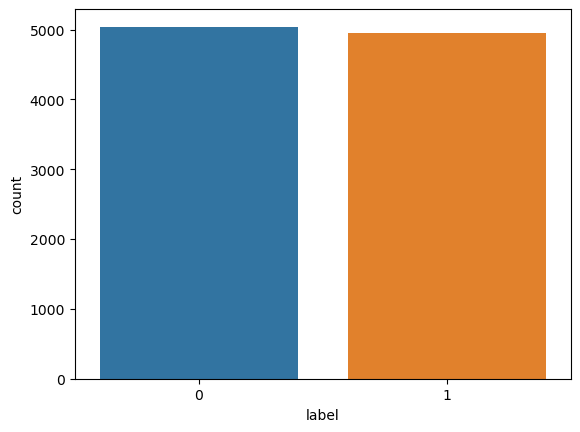

In [6]:
import seaborn as sns
sns.countplot(x = "label", data = df)

# Identifying and Removing Duplicates

In [7]:
df.duplicated().sum()

13

In [8]:
# Dropping duplicates
clean_df = df.drop_duplicates(keep='first')
clean_df.duplicated().sum()

0

# Sia Polarity Score

In [9]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\NIisarg\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
from nltk.sentiment import vader
sia = vader.SentimentIntensityAnalyzer()

In [11]:
clean_df['sentiment'] = clean_df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

C:\Users\NIisarg\AppData\Local\Temp\ipykernel_2600\30671747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['sentiment'] = clean_df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [12]:
clean_df.head()

,text,label,sentiment
0,I grew up (b. 1965) watching and loving the Th...,0,0.6502
1,"When I put this movie in my DVD player, and sa...",0,0.9314
2,Why do people who do not know what a particula...,0,-0.9568
3,Even though I have great interest in Biblical ...,0,-0.7515
4,Im a die hard Dads Army fan and nothing will e...,1,0.7469


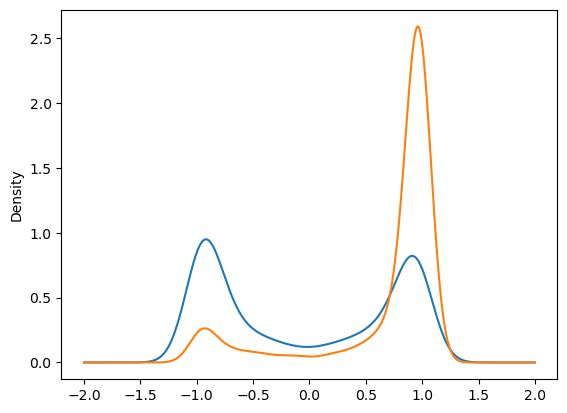

In [13]:
clean_df.groupby(by='label').sentiment.plot.kde();

# Preprocessing Data

In [14]:
Pre_df = clean_df.drop('sentiment', axis = 1)

In [15]:
Pre_df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
9994,"Kubrick proved his brilliantness again, now in...",1
9995,This is one of the most cerebral insightful mo...,1
9996,"First off, this movie is not near complete, my...",0
9997,What can be said about a movie about a cross d...,0


### Removing all html data

In [16]:
import re
# as per recommendation from @freylis, compile once only
CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});') 

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

Pre_df['no_html'] = Pre_df['text'].apply(lambda x : cleanhtml(x))
Pre_df.head()

,text,label,no_html
0,I grew up (b. 1965) watching and loving the Th...,0,I grew up (b. 1965) watching and loving the Th...
1,"When I put this movie in my DVD player, and sa...",0,"When I put this movie in my DVD player, and sa..."
2,Why do people who do not know what a particula...,0,Why do people who do not know what a particula...
3,Even though I have great interest in Biblical ...,0,Even though I have great interest in Biblical ...
4,Im a die hard Dads Army fan and nothing will e...,1,Im a die hard Dads Army fan and nothing will e...


## Removing accented characters

In [17]:
# Remove accented characters
def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text

Pre_df['no_accentchar'] = Pre_df['no_html'].apply(lambda x : remove_accented_chars(x))
Pre_df.head()

,text,label,no_html,no_accentchar
0,I grew up (b. 1965) watching and loving the Th...,0,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...
1,"When I put this movie in my DVD player, and sa...",0,"When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa..."
2,Why do people who do not know what a particula...,0,Why do people who do not know what a particula...,Why do people who do not know what a particula...
3,Even though I have great interest in Biblical ...,0,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...
4,Im a die hard Dads Army fan and nothing will e...,1,Im a die hard Dads Army fan and nothing will e...,Im a die hard Dads Army fan and nothing will e...


## Expanding Contractions

In [18]:
# Expanding contractions 'you've to you have'
!pip install contractions
import contractions
def expand_contractions(text):
    text = contractions.fix(text)
    return text

Pre_df['no_contract'] = Pre_df['no_accentchar'].apply(lambda x : expand_contractions(x))
Pre_df.head()

,text,label,no_html,no_accentchar,no_contract
0,I grew up (b. 1965) watching and loving the Th...,0,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...
1,"When I put this movie in my DVD player, and sa...",0,"When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa..."
2,Why do people who do not know what a particula...,0,Why do people who do not know what a particula...,Why do people who do not know what a particula...,Why do people who do not know what a particula...
3,Even though I have great interest in Biblical ...,0,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...
4,Im a die hard Dads Army fan and nothing will e...,1,Im a die hard Dads Army fan and nothing will e...,Im a die hard Dads Army fan and nothing will e...,I Am a die hard Dads Army fan and nothing will...


In [19]:
Pre_df.text[10]

"I can't believe people are looking for a plot in this film. This is Laural and Hardy. Lighten up already. These two were a riot. Their comic genius is as funny today as it was 70 years ago. Not a filthy word out of either mouth and they were able to keep audiences in stitches. Their comedy wasn't sophisticated by any stretch. If a whoopee cushion can't make you grin, there's no reason to watch any of the stuff these guys did. It was a simpler time, and people laughed at stuff that was funny without a plot. I guess it takes a simple mind to enjoy this stuff, so I qualify. Two man comedy teams don't compute, We're just too sophisticated... Aren't we fortunate?"

In [20]:
Pre_df.no_contract[10]

'I cannot believe people are looking for a plot in this film. This is Laural and Hardy. Lighten up already. These two were a riot. Their comic genius is as funny today as it was 70 years ago. Not a filthy word out of either mouth and they were able to keep audiences in stitches. Their comedy was not sophisticated by any stretch. If a whoopee cushion cannot make you grin, there is no reason to watch any of the stuff these guys did. It was a simpler time, and people laughed at stuff that was funny without a plot. I guess it takes a simple mind to enjoy this stuff, so I qualify. Two man comedy teams do not compute, We are just too sophisticated... Are not we fortunate?'

## Removing Punctuations

In [21]:
# Remove punctuations
import string
def remove_punct(text):
    text_nonpunct = "".join([char for char in text if char not in string.punctuation])
    return text_nonpunct

Pre_df['no_punc_text'] = Pre_df['no_contract'].apply(lambda x : remove_punct(x))
Pre_df.head()

,text,label,no_html,no_accentchar,no_contract,no_punc_text
0,I grew up (b. 1965) watching and loving the Th...,0,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...,I grew up b 1965 watching and loving the Thund...
1,"When I put this movie in my DVD player, and sa...",0,"When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa...",When I put this movie in my DVD player and sat...
2,Why do people who do not know what a particula...,0,Why do people who do not know what a particula...,Why do people who do not know what a particula...,Why do people who do not know what a particula...,Why do people who do not know what a particula...
3,Even though I have great interest in Biblical ...,0,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...
4,Im a die hard Dads Army fan and nothing will e...,1,Im a die hard Dads Army fan and nothing will e...,Im a die hard Dads Army fan and nothing will e...,I Am a die hard Dads Army fan and nothing will...,I Am a die hard Dads Army fan and nothing will...


In [22]:
Pre_df.text[10]

"I can't believe people are looking for a plot in this film. This is Laural and Hardy. Lighten up already. These two were a riot. Their comic genius is as funny today as it was 70 years ago. Not a filthy word out of either mouth and they were able to keep audiences in stitches. Their comedy wasn't sophisticated by any stretch. If a whoopee cushion can't make you grin, there's no reason to watch any of the stuff these guys did. It was a simpler time, and people laughed at stuff that was funny without a plot. I guess it takes a simple mind to enjoy this stuff, so I qualify. Two man comedy teams don't compute, We're just too sophisticated... Aren't we fortunate?"

In [23]:
Pre_df.no_punc_text[10]

'I cannot believe people are looking for a plot in this film This is Laural and Hardy Lighten up already These two were a riot Their comic genius is as funny today as it was 70 years ago Not a filthy word out of either mouth and they were able to keep audiences in stitches Their comedy was not sophisticated by any stretch If a whoopee cushion cannot make you grin there is no reason to watch any of the stuff these guys did It was a simpler time and people laughed at stuff that was funny without a plot I guess it takes a simple mind to enjoy this stuff so I qualify Two man comedy teams do not compute We are just too sophisticated Are not we fortunate'

## Tokenization

In [24]:
# Tokenization of the data
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
Pre_df['tokenized'] = Pre_df['no_punc_text'].apply(word_tokenize)
Pre_df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NIisarg\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


,text,label,no_html,no_accentchar,no_contract,no_punc_text,tokenized
0,I grew up (b. 1965) watching and loving the Th...,0,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...,I grew up b 1965 watching and loving the Thund...,"[I, grew, up, b, 1965, watching, and, loving, ..."
1,"When I put this movie in my DVD player, and sa...",0,"When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa...",When I put this movie in my DVD player and sat...,"[When, I, put, this, movie, in, my, DVD, playe..."
2,Why do people who do not know what a particula...,0,Why do people who do not know what a particula...,Why do people who do not know what a particula...,Why do people who do not know what a particula...,Why do people who do not know what a particula...,"[Why, do, people, who, do, not, know, what, a,..."
3,Even though I have great interest in Biblical ...,0,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,"[Even, though, I, have, great, interest, in, B..."
4,Im a die hard Dads Army fan and nothing will e...,1,Im a die hard Dads Army fan and nothing will e...,Im a die hard Dads Army fan and nothing will e...,I Am a die hard Dads Army fan and nothing will...,I Am a die hard Dads Army fan and nothing will...,"[I, Am, a, die, hard, Dads, Army, fan, and, no..."


In [25]:
Pre_df.tokenized[10]

['I',
 'can',
 'not',
 'believe',
 'people',
 'are',
 'looking',
 'for',
 'a',
 'plot',
 'in',
 'this',
 'film',
 'This',
 'is',
 'Laural',
 'and',
 'Hardy',
 'Lighten',
 'up',
 'already',
 'These',
 'two',
 'were',
 'a',
 'riot',
 'Their',
 'comic',
 'genius',
 'is',
 'as',
 'funny',
 'today',
 'as',
 'it',
 'was',
 '70',
 'years',
 'ago',
 'Not',
 'a',
 'filthy',
 'word',
 'out',
 'of',
 'either',
 'mouth',
 'and',
 'they',
 'were',
 'able',
 'to',
 'keep',
 'audiences',
 'in',
 'stitches',
 'Their',
 'comedy',
 'was',
 'not',
 'sophisticated',
 'by',
 'any',
 'stretch',
 'If',
 'a',
 'whoopee',
 'cushion',
 'can',
 'not',
 'make',
 'you',
 'grin',
 'there',
 'is',
 'no',
 'reason',
 'to',
 'watch',
 'any',
 'of',
 'the',
 'stuff',
 'these',
 'guys',
 'did',
 'It',
 'was',
 'a',
 'simpler',
 'time',
 'and',
 'people',
 'laughed',
 'at',
 'stuff',
 'that',
 'was',
 'funny',
 'without',
 'a',
 'plot',
 'I',
 'guess',
 'it',
 'takes',
 'a',
 'simple',
 'mind',
 'to',
 'enjoy',
 'this',


## Converting Text to Lower Case



In [26]:
# convert text to lower case
Pre_df['lower'] = Pre_df['tokenized'].apply(lambda x: [word.lower() for word in x])
Pre_df.head()

,text,label,no_html,no_accentchar,no_contract,no_punc_text,tokenized,lower
0,I grew up (b. 1965) watching and loving the Th...,0,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...,I grew up b 1965 watching and loving the Thund...,"[I, grew, up, b, 1965, watching, and, loving, ...","[i, grew, up, b, 1965, watching, and, loving, ..."
1,"When I put this movie in my DVD player, and sa...",0,"When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa...",When I put this movie in my DVD player and sat...,"[When, I, put, this, movie, in, my, DVD, playe...","[when, i, put, this, movie, in, my, dvd, playe..."
2,Why do people who do not know what a particula...,0,Why do people who do not know what a particula...,Why do people who do not know what a particula...,Why do people who do not know what a particula...,Why do people who do not know what a particula...,"[Why, do, people, who, do, not, know, what, a,...","[why, do, people, who, do, not, know, what, a,..."
3,Even though I have great interest in Biblical ...,0,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,"[Even, though, I, have, great, interest, in, B...","[even, though, i, have, great, interest, in, b..."
4,Im a die hard Dads Army fan and nothing will e...,1,Im a die hard Dads Army fan and nothing will e...,Im a die hard Dads Army fan and nothing will e...,I Am a die hard Dads Army fan and nothing will...,I Am a die hard Dads Army fan and nothing will...,"[I, Am, a, die, hard, Dads, Army, fan, and, no...","[i, am, a, die, hard, dads, army, fan, and, no..."


In [27]:
Pre_df.lower[10]

['i',
 'can',
 'not',
 'believe',
 'people',
 'are',
 'looking',
 'for',
 'a',
 'plot',
 'in',
 'this',
 'film',
 'this',
 'is',
 'laural',
 'and',
 'hardy',
 'lighten',
 'up',
 'already',
 'these',
 'two',
 'were',
 'a',
 'riot',
 'their',
 'comic',
 'genius',
 'is',
 'as',
 'funny',
 'today',
 'as',
 'it',
 'was',
 '70',
 'years',
 'ago',
 'not',
 'a',
 'filthy',
 'word',
 'out',
 'of',
 'either',
 'mouth',
 'and',
 'they',
 'were',
 'able',
 'to',
 'keep',
 'audiences',
 'in',
 'stitches',
 'their',
 'comedy',
 'was',
 'not',
 'sophisticated',
 'by',
 'any',
 'stretch',
 'if',
 'a',
 'whoopee',
 'cushion',
 'can',
 'not',
 'make',
 'you',
 'grin',
 'there',
 'is',
 'no',
 'reason',
 'to',
 'watch',
 'any',
 'of',
 'the',
 'stuff',
 'these',
 'guys',
 'did',
 'it',
 'was',
 'a',
 'simpler',
 'time',
 'and',
 'people',
 'laughed',
 'at',
 'stuff',
 'that',
 'was',
 'funny',
 'without',
 'a',
 'plot',
 'i',
 'guess',
 'it',
 'takes',
 'a',
 'simple',
 'mind',
 'to',
 'enjoy',
 'this',


## Removing Stopwords

In [28]:
# remove stop words as well as adding some most frequent words to the stopword list
nltk.download('stopwords')
nltk_stopwords = nltk.corpus.stopwords.words('english')
nltk_stopwords.remove('but')
nltk_stopwords.remove('no')
nltk_stopwords.remove('not')
freq_words = ("movie","film","one","time","would","even","really","see","story")
nltk_stopwords.extend(freq_words)

stop_words = set(stopwords.words('english'))
Pre_df['no_stopwords'] = Pre_df['lower'].apply(lambda x: [word for word in x if word not in nltk_stopwords])
Pre_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NIisarg\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,text,label,no_html,no_accentchar,no_contract,no_punc_text,tokenized,lower,no_stopwords
0,I grew up (b. 1965) watching and loving the Th...,0,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...,I grew up b 1965 watching and loving the Thund...,"[I, grew, up, b, 1965, watching, and, loving, ...","[i, grew, up, b, 1965, watching, and, loving, ...","[grew, b, 1965, watching, loving, thunderbirds..."
1,"When I put this movie in my DVD player, and sa...",0,"When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa...",When I put this movie in my DVD player and sat...,"[When, I, put, this, movie, in, my, DVD, playe...","[when, i, put, this, movie, in, my, dvd, playe...","[put, dvd, player, sat, coke, chips, expectati..."
2,Why do people who do not know what a particula...,0,Why do people who do not know what a particula...,Why do people who do not know what a particula...,Why do people who do not know what a particula...,Why do people who do not know what a particula...,"[Why, do, people, who, do, not, know, what, a,...","[why, do, people, who, do, not, know, what, a,...","[people, not, know, particular, past, like, fe..."
3,Even though I have great interest in Biblical ...,0,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,"[Even, though, I, have, great, interest, in, B...","[even, though, i, have, great, interest, in, b...","[though, great, interest, biblical, movies, bo..."
4,Im a die hard Dads Army fan and nothing will e...,1,Im a die hard Dads Army fan and nothing will e...,Im a die hard Dads Army fan and nothing will e...,I Am a die hard Dads Army fan and nothing will...,I Am a die hard Dads Army fan and nothing will...,"[I, Am, a, die, hard, Dads, Army, fan, and, no...","[i, am, a, die, hard, dads, army, fan, and, no...","[die, hard, dads, army, fan, nothing, ever, ch..."


In [29]:
Pre_df.no_stopwords[10]

['not',
 'believe',
 'people',
 'looking',
 'plot',
 'laural',
 'hardy',
 'lighten',
 'already',
 'two',
 'riot',
 'comic',
 'genius',
 'funny',
 'today',
 '70',
 'years',
 'ago',
 'not',
 'filthy',
 'word',
 'either',
 'mouth',
 'able',
 'keep',
 'audiences',
 'stitches',
 'comedy',
 'not',
 'sophisticated',
 'stretch',
 'whoopee',
 'cushion',
 'not',
 'make',
 'grin',
 'no',
 'reason',
 'watch',
 'stuff',
 'guys',
 'simpler',
 'people',
 'laughed',
 'stuff',
 'funny',
 'without',
 'plot',
 'guess',
 'takes',
 'simple',
 'mind',
 'enjoy',
 'stuff',
 'qualify',
 'two',
 'man',
 'comedy',
 'teams',
 'not',
 'compute',
 'sophisticated',
 'not',
 'fortunate']

## Frequent word Analysis

In [30]:
listOfordWords = [w for comment in Pre_df.no_stopwords for w in comment]
listOfordWords[0:10]

['grew',
 'b',
 '1965',
 'watching',
 'loving',
 'thunderbirds',
 'mates',
 'school',
 'watched',
 'played']

In [31]:
len(listOfordWords)

1147889

In [32]:
len(set(listOfordWords))

81724

In [33]:
from nltk import FreqDist
fdist = FreqDist(listOfordWords)
fdist.most_common(30)

[('not', 25705),
 ('but', 16075),
 ('like', 7980),
 ('good', 5693),
 ('no', 4833),
 ('much', 3837),
 ('could', 3710),
 ('well', 3695),
 ('great', 3643),
 ('also', 3588),
 ('bad', 3566),
 ('get', 3555),
 ('people', 3481),
 ('first', 3330),
 ('make', 3135),
 ('made', 3090),
 ('films', 3066),
 ('movies', 3061),
 ('way', 3047),
 ('characters', 2947),
 ('think', 2790),
 ('watch', 2672),
 ('seen', 2652),
 ('never', 2639),
 ('many', 2614),
 ('character', 2594),
 ('two', 2549),
 ('love', 2545),
 ('little', 2533),
 ('know', 2521)]

## Lemmatization

In [34]:
# parts of speech of each word for lemmatization purpose
nltk.download('averaged_perceptron_tagger')
Pre_df['pos_tags'] = Pre_df['no_stopwords'].apply(nltk.tag.pos_tag)
Pre_df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\NIisarg\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,text,label,no_html,no_accentchar,no_contract,no_punc_text,tokenized,lower,no_stopwords,pos_tags
0,I grew up (b. 1965) watching and loving the Th...,0,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...,I grew up b 1965 watching and loving the Thund...,"[I, grew, up, b, 1965, watching, and, loving, ...","[i, grew, up, b, 1965, watching, and, loving, ...","[grew, b, 1965, watching, loving, thunderbirds...","[(grew, VBD), (b, NN), (1965, CD), (watching, ..."
1,"When I put this movie in my DVD player, and sa...",0,"When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa...",When I put this movie in my DVD player and sat...,"[When, I, put, this, movie, in, my, DVD, playe...","[when, i, put, this, movie, in, my, dvd, playe...","[put, dvd, player, sat, coke, chips, expectati...","[(put, NN), (dvd, NN), (player, NN), (sat, VBD..."
2,Why do people who do not know what a particula...,0,Why do people who do not know what a particula...,Why do people who do not know what a particula...,Why do people who do not know what a particula...,Why do people who do not know what a particula...,"[Why, do, people, who, do, not, know, what, a,...","[why, do, people, who, do, not, know, what, a,...","[people, not, know, particular, past, like, fe...","[(people, NNS), (not, RB), (know, VB), (partic..."
3,Even though I have great interest in Biblical ...,0,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,"[Even, though, I, have, great, interest, in, B...","[even, though, i, have, great, interest, in, b...","[though, great, interest, biblical, movies, bo...","[(though, IN), (great, JJ), (interest, NN), (b..."
4,Im a die hard Dads Army fan and nothing will e...,1,Im a die hard Dads Army fan and nothing will e...,Im a die hard Dads Army fan and nothing will e...,I Am a die hard Dads Army fan and nothing will...,I Am a die hard Dads Army fan and nothing will...,"[I, Am, a, die, hard, Dads, Army, fan, and, no...","[i, am, a, die, hard, dads, army, fan, and, no...","[die, hard, dads, army, fan, nothing, ever, ch...","[(die, RB), (hard, JJ), (dads, NNS), (army, VB..."


In [35]:
Pre_df.pos_tags[10]

[('not', 'RB'),
 ('believe', 'VB'),
 ('people', 'NNS'),
 ('looking', 'VBG'),
 ('plot', 'JJ'),
 ('laural', 'JJ'),
 ('hardy', 'NN'),
 ('lighten', 'NNS'),
 ('already', 'RB'),
 ('two', 'CD'),
 ('riot', 'NNS'),
 ('comic', 'JJ'),
 ('genius', 'NN'),
 ('funny', 'JJ'),
 ('today', 'NN'),
 ('70', 'CD'),
 ('years', 'NNS'),
 ('ago', 'RB'),
 ('not', 'RB'),
 ('filthy', 'JJ'),
 ('word', 'NN'),
 ('either', 'DT'),
 ('mouth', 'NN'),
 ('able', 'JJ'),
 ('keep', 'NN'),
 ('audiences', 'NNS'),
 ('stitches', 'NNS'),
 ('comedy', 'VBP'),
 ('not', 'RB'),
 ('sophisticated', 'JJ'),
 ('stretch', 'NN'),
 ('whoopee', 'NN'),
 ('cushion', 'NN'),
 ('not', 'RB'),
 ('make', 'VB'),
 ('grin', 'NN'),
 ('no', 'DT'),
 ('reason', 'NN'),
 ('watch', 'VB'),
 ('stuff', 'NN'),
 ('guys', 'NNS'),
 ('simpler', 'VBP'),
 ('people', 'NNS'),
 ('laughed', 'VBD'),
 ('stuff', 'JJ'),
 ('funny', 'NN'),
 ('without', 'IN'),
 ('plot', 'NN'),
 ('guess', 'NN'),
 ('takes', 'VBZ'),
 ('simple', 'JJ'),
 ('mind', 'NN'),
 ('enjoy', 'JJ'),
 ('stuff', 'JJ'),

In [36]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\NIisarg\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [37]:
nltk.download('wordnet')
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
Pre_df['wordnet_pos'] = Pre_df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
Pre_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NIisarg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,label,no_html,no_accentchar,no_contract,no_punc_text,tokenized,lower,no_stopwords,pos_tags,wordnet_pos
0,I grew up (b. 1965) watching and loving the Th...,0,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...,I grew up b 1965 watching and loving the Thund...,"[I, grew, up, b, 1965, watching, and, loving, ...","[i, grew, up, b, 1965, watching, and, loving, ...","[grew, b, 1965, watching, loving, thunderbirds...","[(grew, VBD), (b, NN), (1965, CD), (watching, ...","[(grew, v), (b, n), (1965, n), (watching, v), ..."
1,"When I put this movie in my DVD player, and sa...",0,"When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa...",When I put this movie in my DVD player and sat...,"[When, I, put, this, movie, in, my, DVD, playe...","[when, i, put, this, movie, in, my, dvd, playe...","[put, dvd, player, sat, coke, chips, expectati...","[(put, NN), (dvd, NN), (player, NN), (sat, VBD...","[(put, n), (dvd, n), (player, n), (sat, v), (c..."
2,Why do people who do not know what a particula...,0,Why do people who do not know what a particula...,Why do people who do not know what a particula...,Why do people who do not know what a particula...,Why do people who do not know what a particula...,"[Why, do, people, who, do, not, know, what, a,...","[why, do, people, who, do, not, know, what, a,...","[people, not, know, particular, past, like, fe...","[(people, NNS), (not, RB), (know, VB), (partic...","[(people, n), (not, r), (know, v), (particular..."
3,Even though I have great interest in Biblical ...,0,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,"[Even, though, I, have, great, interest, in, B...","[even, though, i, have, great, interest, in, b...","[though, great, interest, biblical, movies, bo...","[(though, IN), (great, JJ), (interest, NN), (b...","[(though, n), (great, a), (interest, n), (bibl..."
4,Im a die hard Dads Army fan and nothing will e...,1,Im a die hard Dads Army fan and nothing will e...,Im a die hard Dads Army fan and nothing will e...,I Am a die hard Dads Army fan and nothing will...,I Am a die hard Dads Army fan and nothing will...,"[I, Am, a, die, hard, Dads, Army, fan, and, no...","[i, am, a, die, hard, dads, army, fan, and, no...","[die, hard, dads, army, fan, nothing, ever, ch...","[(die, RB), (hard, JJ), (dads, NNS), (army, VB...","[(die, r), (hard, a), (dads, n), (army, v), (f..."


In [38]:
Pre_df.wordnet_pos[10]

[('not', 'r'),
 ('believe', 'v'),
 ('people', 'n'),
 ('looking', 'v'),
 ('plot', 'a'),
 ('laural', 'a'),
 ('hardy', 'n'),
 ('lighten', 'n'),
 ('already', 'r'),
 ('two', 'n'),
 ('riot', 'n'),
 ('comic', 'a'),
 ('genius', 'n'),
 ('funny', 'a'),
 ('today', 'n'),
 ('70', 'n'),
 ('years', 'n'),
 ('ago', 'r'),
 ('not', 'r'),
 ('filthy', 'a'),
 ('word', 'n'),
 ('either', 'n'),
 ('mouth', 'n'),
 ('able', 'a'),
 ('keep', 'n'),
 ('audiences', 'n'),
 ('stitches', 'n'),
 ('comedy', 'v'),
 ('not', 'r'),
 ('sophisticated', 'a'),
 ('stretch', 'n'),
 ('whoopee', 'n'),
 ('cushion', 'n'),
 ('not', 'r'),
 ('make', 'v'),
 ('grin', 'n'),
 ('no', 'n'),
 ('reason', 'n'),
 ('watch', 'v'),
 ('stuff', 'n'),
 ('guys', 'n'),
 ('simpler', 'v'),
 ('people', 'n'),
 ('laughed', 'v'),
 ('stuff', 'a'),
 ('funny', 'n'),
 ('without', 'n'),
 ('plot', 'n'),
 ('guess', 'n'),
 ('takes', 'v'),
 ('simple', 'a'),
 ('mind', 'n'),
 ('enjoy', 'a'),
 ('stuff', 'a'),
 ('qualify', 'n'),
 ('two', 'n'),
 ('man', 'n'),
 ('comedy', 'n'),

In [39]:
# Lemmatization of data
wnl = WordNetLemmatizer()
Pre_df['lemmatized'] = Pre_df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
Pre_df.head()

,text,label,no_html,no_accentchar,no_contract,no_punc_text,tokenized,lower,no_stopwords,pos_tags,wordnet_pos,lemmatized
0,I grew up (b. 1965) watching and loving the Th...,0,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...,I grew up b 1965 watching and loving the Thund...,"[I, grew, up, b, 1965, watching, and, loving, ...","[i, grew, up, b, 1965, watching, and, loving, ...","[grew, b, 1965, watching, loving, thunderbirds...","[(grew, VBD), (b, NN), (1965, CD), (watching, ...","[(grew, v), (b, n), (1965, n), (watching, v), ...","[grow, b, 1965, watch, love, thunderbird, mat,..."
1,"When I put this movie in my DVD player, and sa...",0,"When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa...",When I put this movie in my DVD player and sat...,"[When, I, put, this, movie, in, my, DVD, playe...","[when, i, put, this, movie, in, my, dvd, playe...","[put, dvd, player, sat, coke, chips, expectati...","[(put, NN), (dvd, NN), (player, NN), (sat, VBD...","[(put, n), (dvd, n), (player, n), (sat, v), (c...","[put, dvd, player, sit, coke, chip, expectatio..."
2,Why do people who do not know what a particula...,0,Why do people who do not know what a particula...,Why do people who do not know what a particula...,Why do people who do not know what a particula...,Why do people who do not know what a particula...,"[Why, do, people, who, do, not, know, what, a,...","[why, do, people, who, do, not, know, what, a,...","[people, not, know, particular, past, like, fe...","[(people, NNS), (not, RB), (know, VB), (partic...","[(people, n), (not, r), (know, v), (particular...","[people, not, know, particular, past, like, fe..."
3,Even though I have great interest in Biblical ...,0,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,"[Even, though, I, have, great, interest, in, B...","[even, though, i, have, great, interest, in, b...","[though, great, interest, biblical, movies, bo...","[(though, IN), (great, JJ), (interest, NN), (b...","[(though, n), (great, a), (interest, n), (bibl...","[though, great, interest, biblical, movie, bor..."
4,Im a die hard Dads Army fan and nothing will e...,1,Im a die hard Dads Army fan and nothing will e...,Im a die hard Dads Army fan and nothing will e...,I Am a die hard Dads Army fan and nothing will...,I Am a die hard Dads Army fan and nothing will...,"[I, Am, a, die, hard, Dads, Army, fan, and, no...","[i, am, a, die, hard, dads, army, fan, and, no...","[die, hard, dads, army, fan, nothing, ever, ch...","[(die, RB), (hard, JJ), (dads, NNS), (army, VB...","[(die, r), (hard, a), (dads, n), (army, v), (f...","[die, hard, dad, army, fan, nothing, ever, cha..."


In [40]:
Pre_df.lemmatized[10]

['not',
 'believe',
 'people',
 'look',
 'plot',
 'laural',
 'hardy',
 'lighten',
 'already',
 'two',
 'riot',
 'comic',
 'genius',
 'funny',
 'today',
 '70',
 'year',
 'ago',
 'not',
 'filthy',
 'word',
 'either',
 'mouth',
 'able',
 'keep',
 'audience',
 'stitch',
 'comedy',
 'not',
 'sophisticated',
 'stretch',
 'whoopee',
 'cushion',
 'not',
 'make',
 'grin',
 'no',
 'reason',
 'watch',
 'stuff',
 'guy',
 'simpler',
 'people',
 'laugh',
 'stuff',
 'funny',
 'without',
 'plot',
 'guess',
 'take',
 'simple',
 'mind',
 'enjoy',
 'stuff',
 'qualify',
 'two',
 'man',
 'comedy',
 'team',
 'not',
 'compute',
 'sophisticated',
 'not',
 'fortunate']

In [41]:
Pre_df['lemmatized_str'] = [' '.join(map(str, l)) for l in Pre_df['lemmatized']]
Pre_df.head()

,text,label,no_html,no_accentchar,no_contract,no_punc_text,tokenized,lower,no_stopwords,pos_tags,wordnet_pos,lemmatized,lemmatized_str
0,I grew up (b. 1965) watching and loving the Th...,0,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...,I grew up b 1965 watching and loving the Thund...,"[I, grew, up, b, 1965, watching, and, loving, ...","[i, grew, up, b, 1965, watching, and, loving, ...","[grew, b, 1965, watching, loving, thunderbirds...","[(grew, VBD), (b, NN), (1965, CD), (watching, ...","[(grew, v), (b, n), (1965, n), (watching, v), ...","[grow, b, 1965, watch, love, thunderbird, mat,...",grow b 1965 watch love thunderbird mat school ...
1,"When I put this movie in my DVD player, and sa...",0,"When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa...",When I put this movie in my DVD player and sat...,"[When, I, put, this, movie, in, my, DVD, playe...","[when, i, put, this, movie, in, my, dvd, playe...","[put, dvd, player, sat, coke, chips, expectati...","[(put, NN), (dvd, NN), (player, NN), (sat, VBD...","[(put, n), (dvd, n), (player, n), (sat, v), (c...","[put, dvd, player, sit, coke, chip, expectatio...",put dvd player sit coke chip expectation hop c...
2,Why do people who do not know what a particula...,0,Why do people who do not know what a particula...,Why do people who do not know what a particula...,Why do people who do not know what a particula...,Why do people who do not know what a particula...,"[Why, do, people, who, do, not, know, what, a,...","[why, do, people, who, do, not, know, what, a,...","[people, not, know, particular, past, like, fe...","[(people, NNS), (not, RB), (know, VB), (partic...","[(people, n), (not, r), (know, v), (particular...","[people, not, know, particular, past, like, fe...",people not know particular past like feel need...
3,Even though I have great interest in Biblical ...,0,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,"[Even, though, I, have, great, interest, in, B...","[even, though, i, have, great, interest, in, b...","[though, great, interest, biblical, movies, bo...","[(though, IN), (great, JJ), (interest, NN), (b...","[(though, n), (great, a), (interest, n), (bibl...","[though, great, interest, biblical, movie, bor...",though great interest biblical movie bore deat...
4,Im a die hard Dads Army fan and nothing will e...,1,Im a die hard Dads Army fan and nothing will e...,Im a die hard Dads Army fan and nothing will e...,I Am a die hard Dads Army fan and nothing will...,I Am a die hard Dads Army fan and nothing will...,"[I, Am, a, die, hard, Dads, Army, fan, and, no...","[i, am, a, die, hard, dads, army, fan, and, no...","[die, hard, dads, army, fan, nothing, ever, ch...","[(die, RB), (hard, JJ), (dads, NNS), (army, VB...","[(die, r), (hard, a), (dads, n), (army, v), (f...","[die, hard, dad, army, fan, nothing, ever, cha...",die hard dad army fan nothing ever change get ...


In [42]:
Pre_df.lemmatized_str[0]

'grow b 1965 watch love thunderbird mat school watch play thunderbird school lunch school want virgil scott no want alan count 5 become art form take child hop get glimpse love child bitterly disappointing high point snappy theme tune not could compare original score thunderbird thankfully early saturday morning television channel still play reruns series gerry anderson wife create jonatha frakes hand director chair version completely hopeless waste utter rubbish cgi remake may acceptable but replace marionette homo sapiens subsp sapiens huge error judgment'

# Data Modeling

In [43]:
final_data = Pre_df.drop(['text','no_html','no_accentchar','no_contract','no_punc_text','tokenized','lower','no_stopwords','pos_tags','wordnet_pos','lemmatized'],axis=1)

In [44]:
final_data

,label,lemmatized_str
0,0,grow b 1965 watch love thunderbird mat school ...
1,0,put dvd player sit coke chip expectation hop c...
2,0,people not know particular past like feel need...
3,0,though great interest biblical movie bore deat...
4,1,die hard dad army fan nothing ever change get ...
...,...,...
9994,1,kubrick prove brilliantness suspensehorror bas...
9995,1,cerebral insightful movie ever see script lang...
9996,0,first not near complete guess someone actually...
9997,0,say cross dress gangster not much average indi...


In [45]:
X = final_data['lemmatized_str']
y = final_data['label']

In [46]:
X

0       grow b 1965 watch love thunderbird mat school ...
1       put dvd player sit coke chip expectation hop c...
2       people not know particular past like feel need...
3       though great interest biblical movie bore deat...
4       die hard dad army fan nothing ever change get ...
                              ...                        
9994    kubrick prove brilliantness suspensehorror bas...
9995    cerebral insightful movie ever see script lang...
9996    first not near complete guess someone actually...
9997    say cross dress gangster not much average indi...
9998    like adult comedy cartoon like south park near...
Name: lemmatized_str, Length: 9986, dtype: object

In [47]:
y

0       0
1       0
2       0
3       0
4       1
       ..
9994    1
9995    1
9996    0
9997    0
9998    1
Name: label, Length: 9986, dtype: int64

## Perform a Stratified ShuffleSplit

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7988,) (1998,) (7988,) (1998,)


In [49]:
print("X_train:\n{}".format(X_train[:10]))
print("=========================================")
print("X_test:\n{}".format(X_test[:10]))
print("=========================================")
print("y_train:\n{}".format(y_train[:10]))
print("=========================================")
print("y_test:\n{}".format(y_test[:10]))

X_train:
6777    best come across long not best kindschool shoo...
5783    comment miniseries perspective someone read no...
3774    babysitting family three small child night mot...
4683    not enjoy eraser whatsoever awful act boring s...
9113    shot use digital camera show enough annoy digi...
356     best ever direction fotography thrill dramatic...
2294    first scene give clue may go becomes obvious r...
8296    marine camp pendleton di come 1st marine divis...
8793    star annmargret frederic forrest cathryn damon...
351     creator donnie darko brings twilight zone them...
Name: lemmatized_str, dtype: object
X_test:
3974    low budget but still creepy enough hold intere...
1758    series short spoof dumb tv show groove tube hi...
5112    universal studio name conjure many memory horr...
2626    like know john amos leave show die show could ...
7119    wonderful rare moment tv wish capture forever ...
518     dog go heaven animated kid like no gamble drin...
4651    huge fan no

## Apply TF-IDF Transformation

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tr = vectorizer.fit_transform(X_train) # fit and transform the train set
X_test_tr = vectorizer.transform(X_test) # only transform the test set

print("X_train_tr:\n{0}".format(X_train_tr[:10]))
print("=========================================")
print("X_test_tr:\n{0}".format(X_test_tr[:10]))
print("=========================================")
print("y_train:\n{0}".format(y_train[:10]))
print("=========================================")
print("y_test:\n{0}".format(y_test[:10]))

X_train_tr:
  (0, 49588)	0.0529205122320064
  (0, 51319)	0.07813286978541513
  (0, 4982)	0.15263601052253664
  (0, 60490)	0.1767735187305759
  (0, 60570)	0.159589907894928
  (0, 48026)	0.2164884994293002
  (0, 45625)	0.12704198520085705
  (0, 48025)	0.2164884994293002
  (0, 31846)	0.1148427615874271
  (0, 7878)	0.1511794934088963
  (0, 8937)	0.07897670517946945
  (0, 8894)	0.19089447410762056
  (0, 19210)	0.09062402190361862
  (0, 27279)	0.07460753553846927
  (0, 59976)	0.15189637107286433
  (0, 51778)	0.14447745455235797
  (0, 62858)	0.2164884994293002
  (0, 28406)	0.11368492402405152
  (0, 4229)	0.2164884994293002
  (0, 2823)	0.07740762255576876
  (0, 15357)	0.171155242062396
  (0, 60622)	0.09346656587162569
  (0, 32834)	0.04035154956720287
  (0, 37668)	0.05316095581744206
  (0, 49617)	0.06000000339983212
  :	:
  (9, 32578)	0.11446840327839326
  (9, 36200)	0.08537915671305785
  (9, 61793)	0.03413013428459973
  (9, 19423)	0.058296922891561756
  (9, 31369)	0.11729392191303885
  (9, 105

## Logistic Regression

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.linear_model import LogisticRegression
import warnings

In [52]:
warnings.filterwarnings("ignore")

In [53]:
scoringLR = {'Accuracy_score': 'accuracy', 'Precision (macro)': 'precision_macro', 'Recall_score': 'recall_macro', 'f1_score': 'f1_macro', 'AUC': 'roc_auc'} 

param_gridLR = {
                'penalty': ('l1', 'l2'),
                'C': (0.01, 0.1, 1, 10)
                }

resultLR = GridSearchCV(estimator=LogisticRegression(), param_grid=param_gridLR, cv=5, return_train_score=True, n_jobs=-1, verbose=1, scoring= scoringLR, refit="Accuracy_score")

In [54]:
resultLR.fit(X_train_tr, y_train) # fit the model on the train set

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': (0.01, 0.1, 1, 10), 'penalty': ('l1', 'l2')},
             refit='Accuracy_score', return_train_score=True,
             scoring={'AUC': 'roc_auc', 'Accuracy_score': 'accuracy',
                      'Precision (macro)': 'precision_macro',
                      'Recall_score': 'recall_macro', 'f1_score': 'f1_macro'},
             verbose=1)

In [91]:
print("Test set score: {:.2f}".format(resultLR.score(X_test_tr, y_test)))
print("Best parameters: {}".format(resultLR.best_params_))
print("Best F1 score: {:.2f}".format(resultLR.best_score_))
print("Best estimator:\n{}".format(resultLR.best_estimator_))

Test set score: 0.88
Best parameters: {'C': 10, 'penalty': 'l2'}
Best F1 score: 0.87
Best estimator:
LogisticRegression(C=10)


In [55]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

y_predLR = resultLR.predict(X_test_tr)
print('Testing results:\n' + 'Accuracy:', metrics.accuracy_score(y_test, y_predLR))
cmLR = pd.DataFrame(confusion_matrix(y_test, y_predLR, labels=[1, 0]),
                  index=['actual 0', 'actual 1'],
                  columns=['predicted 0', 'predicted 1'])
print('Confusion matrix:\n', cmLR)

print("\n'1' is positive class")
TPLR = cmLR.at['actual 0', 'predicted 0']
FPLR = cmLR.at['actual 1', 'predicted 0']
FNLR = cmLR.at['actual 0', 'predicted 1']
print('precision =', TPLR/(TPLR+FPLR), ', recall =', TPLR/(TPLR+FNLR), ', F1-score =', 2*TPLR/(2*TPLR+FPLR+FNLR))

Testing results:
Accuracy: 0.8753753753753754
Confusion matrix:
           predicted 0  predicted 1
actual 0          879          112
actual 1          137          870

'1' is positive class
precision = 0.8651574803149606 , recall = 0.8869828456104945 , F1-score = 0.8759342301943199


## Stochastic Gradient Descent (SGD)

In [56]:
from sklearn.linear_model import SGDClassifier

scoringSGD = {'Accuracy_score': 'accuracy', 'Precision (macro)': 'precision_macro', 'Recall_score': 'recall_macro', 'f1_score': 'f1_macro', 'AUC': 'roc_auc'} 

param_gridSGD = {'alpha': [1e-2,1e-3]
                  }

resultSGD = GridSearchCV(estimator=SGDClassifier(), param_grid=param_gridSGD, cv=5, return_train_score=True, n_jobs=-1, verbose=1, scoring= scoringSGD, refit="Accuracy_score")

In [57]:
resultSGD.fit(X_train_tr, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.001]}, refit='Accuracy_score',
             return_train_score=True,
             scoring={'AUC': 'roc_auc', 'Accuracy_score': 'accuracy',
                      'Precision (macro)': 'precision_macro',
                      'Recall_score': 'recall_macro', 'f1_score': 'f1_macro'},
             verbose=1)

In [90]:
print("Test set score: {:.2f}".format(resultSGD.score(X_test_tr, y_test)))
print("Best parameters: {}".format(resultSGD.best_params_))
print("Best F1 score: {:.2f}".format(resultSGD.best_score_))
print("Best estimator:\n{}".format(resultSGD.best_estimator_))

Test set score: 0.86
Best parameters: {'alpha': 0.001}
Best F1 score: 0.84
Best estimator:
SGDClassifier(alpha=0.001)


In [58]:
y_predSGD = resultSGD.predict(X_test_tr)
print('Testing results:\n' + 'Accuracy:', metrics.accuracy_score(y_test, y_predSGD))
cmSGD = pd.DataFrame(confusion_matrix(y_test, y_predSGD, labels=[1, 0]),
                  index=['actual 0', 'actual 1'],
                  columns=['predicted 0', 'predicted 1'])
print('Confusion matrix:\n', cmSGD)

print("\n'1' is positive class")
TPSGD = cmSGD.at['actual 0', 'predicted 0']
FPSGD = cmSGD.at['actual 1', 'predicted 0']
FNSGD = cmSGD.at['actual 0', 'predicted 1']
print('precision =', TPSGD/(TPSGD+FPSGD), ', recall =', TPSGD/(TPSGD+FNSGD), ', F1-score =', 2*TPSGD/(2*TPSGD+FPSGD+FNSGD))

Testing results:
Accuracy: 0.8573573573573574
Confusion matrix:
           predicted 0  predicted 1
actual 0          912           79
actual 1          206          801

'1' is positive class
precision = 0.815742397137746 , recall = 0.9202825428859738 , F1-score = 0.8648648648648649


### Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
scoringRFC = {'Accuracy_score': 'accuracy', 'Precision (macro)': 'precision_macro', 'Recall_score': 'recall_macro', 'f1_score': 'f1_macro', 'AUC': 'roc_auc'} 

param_gridRFC = {'n_estimators': [400,600,800,1000],
                 'min_samples_leaf' : [2], 
                 'max_depth': [1,3,5,10]
                }

resultRFC = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_gridRFC, cv=5, return_train_score=True, n_jobs=-1, verbose=1, scoring= scoringRFC, refit="Accuracy_score")

In [87]:
resultRFC.fit(X_train_tr, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 10], 'min_samples_leaf': [2],
                         'n_estimators': [400, 600, 800, 1000]},
             refit='Accuracy_score', return_train_score=True,
             scoring={'AUC': 'roc_auc', 'Accuracy_score': 'accuracy',
                      'Precision (macro)': 'precision_macro',
                      'Recall_score': 'recall_macro', 'f1_score': 'f1_macro'},
             verbose=1)

In [89]:
print("Test set score: {:.2f}".format(resultRFC.score(X_test_tr, y_test)))
print("Best parameters: {}".format(resultRFC.best_params_))
print("Best F1 score: {:.2f}".format(resultRFC.best_score_))
print("Best estimator:\n{}".format(resultRFC.best_estimator_))

Test set score: 0.84
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 800}
Best F1 score: 0.84
Best estimator:
RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=800)


In [88]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

y_predRFC = resultRFC.predict(X_test_tr)
print('Testing results:\n' + 'Accuracy:', metrics.accuracy_score(y_test, y_predRFC))
cmRFC = pd.DataFrame(confusion_matrix(y_test, y_predRFC, labels=[1, 0]),
                  index=['actual 0', 'actual 1'],
                  columns=['predicted 0', 'predicted 1'])
print('Confusion matrix:\n', cmRFC)

print("\n'1' is positive class")
TPRFC = cmRFC.at['actual 0', 'predicted 0']
FPRFC = cmRFC.at['actual 1', 'predicted 0']
FNRFC = cmRFC.at['actual 0', 'predicted 1']
print('precision =', TPRFC/(TPRFC+FPRFC), ', recall =', TPRFC/(TPRFC+FNRFC), ', F1-score =', 2*TPRFC/(2*TPRFC+FPRFC+FNRFC))

Testing results:
Accuracy: 0.8448448448448449
Confusion matrix:
           predicted 0  predicted 1
actual 0          839          152
actual 1          158          849

'1' is positive class
precision = 0.8415245737211635 , recall = 0.8466195761856711 , F1-score = 0.8440643863179075


# Topic Modeling

In [63]:
Pre_df

,text,label,no_html,no_accentchar,no_contract,no_punc_text,tokenized,lower,no_stopwords,pos_tags,wordnet_pos,lemmatized,lemmatized_str
0,I grew up (b. 1965) watching and loving the Th...,0,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...,I grew up (b. 1965) watching and loving the Th...,I grew up b 1965 watching and loving the Thund...,"[I, grew, up, b, 1965, watching, and, loving, ...","[i, grew, up, b, 1965, watching, and, loving, ...","[grew, b, 1965, watching, loving, thunderbirds...","[(grew, VBD), (b, NN), (1965, CD), (watching, ...","[(grew, v), (b, n), (1965, n), (watching, v), ...","[grow, b, 1965, watch, love, thunderbird, mat,...",grow b 1965 watch love thunderbird mat school ...
1,"When I put this movie in my DVD player, and sa...",0,"When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa...","When I put this movie in my DVD player, and sa...",When I put this movie in my DVD player and sat...,"[When, I, put, this, movie, in, my, DVD, playe...","[when, i, put, this, movie, in, my, dvd, playe...","[put, dvd, player, sat, coke, chips, expectati...","[(put, NN), (dvd, NN), (player, NN), (sat, VBD...","[(put, n), (dvd, n), (player, n), (sat, v), (c...","[put, dvd, player, sit, coke, chip, expectatio...",put dvd player sit coke chip expectation hop c...
2,Why do people who do not know what a particula...,0,Why do people who do not know what a particula...,Why do people who do not know what a particula...,Why do people who do not know what a particula...,Why do people who do not know what a particula...,"[Why, do, people, who, do, not, know, what, a,...","[why, do, people, who, do, not, know, what, a,...","[people, not, know, particular, past, like, fe...","[(people, NNS), (not, RB), (know, VB), (partic...","[(people, n), (not, r), (know, v), (particular...","[people, not, know, particular, past, like, fe...",people not know particular past like feel need...
3,Even though I have great interest in Biblical ...,0,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,Even though I have great interest in Biblical ...,"[Even, though, I, have, great, interest, in, B...","[even, though, i, have, great, interest, in, b...","[though, great, interest, biblical, movies, bo...","[(though, IN), (great, JJ), (interest, NN), (b...","[(though, n), (great, a), (interest, n), (bibl...","[though, great, interest, biblical, movie, bor...",though great interest biblical movie bore deat...
4,Im a die hard Dads Army fan and nothing will e...,1,Im a die hard Dads Army fan and nothing will e...,Im a die hard Dads Army fan and nothing will e...,I Am a die hard Dads Army fan and nothing will...,I Am a die hard Dads Army fan and nothing will...,"[I, Am, a, die, hard, Dads, Army, fan, and, no...","[i, am, a, die, hard, dads, army, fan, and, no...","[die, hard, dads, army, fan, nothing, ever, ch...","[(die, RB), (hard, JJ), (dads, NNS), (army, VB...","[(die, r), (hard, a), (dads, n), (army, v), (f...","[die, hard, dad, army, fan, nothing, ever, cha...",die hard dad army fan nothing ever change get ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,"Kubrick proved his brilliantness again, now in...",1,"Kubrick proved his brilliantness again, now in...","Kubrick proved his brilliantness again, now in...","Kubrick proved his brilliantness again, now in...",Kubrick proved his brilliantness again now in ...,"[Kubrick, proved, his, brilliantness, again, n...","[kubrick, proved, his, brilliantness, again, n...","[kubrick, proved, brilliantness, suspensehorro...","[(kubrick, NN), (proved, VBD), (brilliantness,...","[(kubrick, n), (proved, v), (brilliantness, a)...","[kubrick, prove, brilliantness, suspensehorror...",kubrick prove brilliantness suspensehorror bas...
9995,This is one of the most cerebral insightful mo...,1,This is one of the most cerebral insi

### Word Cloud

     -------------------------------------- 153.1/153.1 kB 2.3 MB/s eta 0:00:00


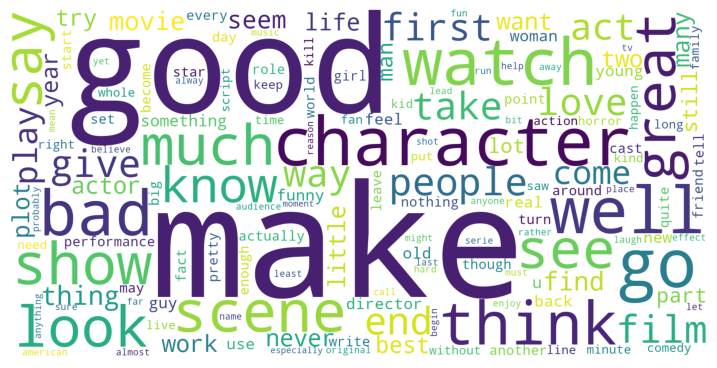

In [64]:
!pip install WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 
wordcloud = WordCloud(
                          collocations = False,
                          width=1600, height=800,
                          background_color='white',
                          max_words=150,
                          #max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(Pre_df['lemmatized_str'])) # can't pass a series, needs to be strings and function computes frequencies
print(wordcloud)
plt.figure(figsize=(9,8))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Document similarity - Bag of Words model

In [65]:
from gensim import corpora, models, similarities
import gensim

In [66]:
dictionary = corpora.Dictionary(Pre_df.lemmatized)

In [67]:
corpus = [dictionary.doc2bow(doc) for doc in Pre_df.lemmatized]

In [68]:
tfidf = models.TfidfModel(dictionary=dictionary) 

In [69]:
index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=len(dictionary))

In [70]:
Pre_df.lemmatized.iloc[10], Pre_df.text.iloc[10]

(['not',
  'believe',
  'people',
  'look',
  'plot',
  'laural',
  'hardy',
  'lighten',
  'already',
  'two',
  'riot',
  'comic',
  'genius',
  'funny',
  'today',
  '70',
  'year',
  'ago',
  'not',
  'filthy',
  'word',
  'either',
  'mouth',
  'able',
  'keep',
  'audience',
  'stitch',
  'comedy',
  'not',
  'sophisticated',
  'stretch',
  'whoopee',
  'cushion',
  'not',
  'make',
  'grin',
  'no',
  'reason',
  'watch',
  'stuff',
  'guy',
  'simpler',
  'people',
  'laugh',
  'stuff',
  'funny',
  'without',
  'plot',
  'guess',
  'take',
  'simple',
  'mind',
  'enjoy',
  'stuff',
  'qualify',
  'two',
  'man',
  'comedy',
  'team',
  'not',
  'compute',
  'sophisticated',
  'not',
  'fortunate'],
 "I can't believe people are looking for a plot in this film. This is Laural and Hardy. Lighten up already. These two were a riot. Their comic genius is as funny today as it was 70 years ago. Not a filthy word out of either mouth and they were able to keep audiences in stitches. Th

In [71]:
doc0 = tfidf[corpus[10]]
sim0 = index[doc0]  # similarity of doc #0 to all other docs
print(doc0)
print() 
print(sim0)

[(43, 0.03497835104335243), (44, 0.03595524441240123), (61, 0.04156194685820051), (72, 0.03186056587279326), (81, 0.07364841112606425), (92, 0.14141087261223745), (100, 0.06928998059090252), (114, 0.12317248568858644), (121, 0.07445808726643637), (170, 0.09144658889544881), (189, 0.039289111619536854), (191, 0.020597845884841568), (204, 0.08532040051016876), (299, 0.05719581982973896), (313, 0.10192643318108834), (320, 0.05010795954316116), (388, 0.06277339712362713), (399, 0.08043699709056096), (411, 0.07057968086445002), (481, 0.0963640576699254), (632, 0.11993089547437755), (633, 0.0938598623986177), (634, 0.10060458210322827), (635, 0.0697137802675733), (636, 0.10733232077476287), (637, 0.25674963150812635), (638, 0.21140196357115718), (639, 0.08326276326159272), (640, 0.1761245219039251), (641, 0.19050369846668244), (642, 0.12025509024780504), (643, 0.17510239610692033), (644, 0.08627523270373909), (645, 0.17827899705043523), (646, 0.0678805793700866), (647, 0.2776478966126011), (

In [72]:
similars = np.argsort(-sim0)[1:10] 

In [73]:
similars

array([5415, 3326, 1668, 8330, 7440, 3473, 3172, 8502, 2595], dtype=int64)

In [74]:
Pre_df.iloc[500].text

"Just because an event really happened doesn't mean that it will make a good screenplay/ movie. The Cat's Meow, by Peter Bogdanovich claims to be based on actual events which happened on a cruise hosted by William Randolph Hurst. The writer paid more attention to creating a bizarre cast of characters than taking time to create a story for the bizarre characters to inhabit. The key moments of the story seem implausible; for example, when Hurst accidentally shoots the producer, believing him to be Chaplin. Basing a key element of a story on someone wearing the wrong hat is trite and contrived. The story attempts to be a dark comedy, but The Cat's Meow misses an important piece of this equation, comedy. There is also a lack of empathy for any of the characters. It hardly matters who is shot, who is killed, who is guilty and who is innocent. There is not a strong character to cheer for. As a result the conflicts are difficult to care about and the eventual outcome is incidental."

In [75]:
 print(Pre_df.iloc[[ 5000,  20, 45, 8947,  645,  4710,  156,   375, 666]])

                                                   text  label  \
5007  I will not say much about this film, because t...      0   
20    Ever since I heard of the Ralph Bakshi version...      1   
45    I like Brad Pitt enormously. He is an actor wi...      0   
8959  Do you know what farmers spray on fields ? Tha...      0   
645   There is something about Doug McLure's appeara...      0   
4717  Angels and Demons: 3 out of 10: Clearly someth...      0   
156   This is a very unusual film in that the star w...      1   
375   This movie is nothing more than Christian prop...      0   
666   Who should watch this film? Anyone who has eve...      1   

                                                no_html  \
5007  I will not say much about this film, because t...   
20    Ever since I heard of the Ralph Bakshi version...   
45    I like Brad Pitt enormously. He is an actor wi...   
8959  Do you know what farmers spray on fields ? Tha...   
645   There is something about Doug McLure's

### LDA

In [76]:
# encode all comments = a corpus.  "Bag of Words"
corpus2 = [dictionary.doc2bow(comment) for comment in Pre_df.lemmatized]
corpus_tfidf = tfidf[corpus2]

In [99]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus_tfidf, num_topics=10, id2word = dictionary, passes=10)

In [78]:
ldamodel.print_topics(num_topics=10, num_words=10)

[(0,
  '0.002*"bad" + 0.002*"like" + 0.002*"good" + 0.002*"watch" + 0.002*"make" + 0.002*"character" + 0.002*"get" + 0.002*"show" + 0.002*"great" + 0.002*"think"'),
 (1,
  '0.002*"drug" + 0.001*"acting" + 0.001*"adam" + 0.001*"purchase" + 0.001*"teach" + 0.001*"nowhere" + 0.001*"scar" + 0.001*"law" + 0.001*"cage" + 0.001*"hook"'),
 (2,
  '0.001*"bollywood" + 0.001*"carmen" + 0.001*"drivel" + 0.000*"frost" + 0.000*"custer" + 0.000*"stanwyck" + 0.000*"belushi" + 0.000*"punk" + 0.000*"snowman" + 0.000*"ramones"'),
 (3,
  '0.001*"holmes" + 0.001*"bullock" + 0.001*"sandra" + 0.001*"scarecrow" + 0.001*"dracula" + 0.001*"elephant" + 0.001*"macy" + 0.000*"garbo" + 0.000*"spiral" + 0.000*"slumber"'),
 (4,
  '0.000*"macarthur" + 0.000*"sleeper" + 0.000*"malkovich" + 0.000*"wesley" + 0.000*"hawn" + 0.000*"bo" + 0.000*"hindi" + 0.000*"kurosawa" + 0.000*"carla" + 0.000*"visconti"'),
 (5,
  '0.001*"scarlett" + 0.001*"robbins" + 0.001*"skate" + 0.001*"leigh" + 0.000*"lupino" + 0.000*"madsen" + 0.000*

In [79]:
corpus_lda = ldamodel[corpus_tfidf]

In [80]:
corpus_lda[0], Pre_df.text[10]

([(0, 0.6521136),
  (1, 0.047866676),
  (2, 0.01625873),
  (3, 0.09002835),
  (4, 0.016258731),
  (5, 0.01625873),
  (6, 0.016258731),
  (7, 0.016258731),
  (8, 0.016258731),
  (9, 0.11243896)],
 "I can't believe people are looking for a plot in this film. This is Laural and Hardy. Lighten up already. These two were a riot. Their comic genius is as funny today as it was 70 years ago. Not a filthy word out of either mouth and they were able to keep audiences in stitches. Their comedy wasn't sophisticated by any stretch. If a whoopee cushion can't make you grin, there's no reason to watch any of the stuff these guys did. It was a simpler time, and people laughed at stuff that was funny without a plot. I guess it takes a simple mind to enjoy this stuff, so I qualify. Two man comedy teams don't compute, We're just too sophisticated... Aren't we fortunate?")

Visualization with the pyLDAvis package.

In [81]:
!pip install pyLDAvis

     ---------------------------------------- 1.7/1.7 MB 3.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136904 sha256=8df48d114d26082dae8bf328c528f991d05040bc204e7d3f657073154e0e41c4
  Stored in directory: c:\users\niisarg\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=2a2f

In [82]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

c:\Users\NIisarg\anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [83]:
pyLDAvis.gensim_models.prepare(ldamodel, corpus_tfidf, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.359149 -0.008310       1        1  75.505982
1     -0.075347 -0.106055       2        1   8.261836
9     -0.056668  0.052941       3        1   4.838418
3     -0.034437  0.011945       4        1   1.856186
2     -0.033553  0.010350       5        1   1.757354
5     -0.032811  0.009351       6        1   1.665661
7     -0.031861  0.007861       7        1   1.561900
6     -0.031700  0.007609       8        1   1.544438
4     -0.031590  0.007474       9        1   1.526729
8     -0.031184  0.006833      10        1   1.481496, topic_info=          Term        Freq       Total Category  logprob  loglift
1064    zombie   10.000000   10.000000  Default  30.0000  30.0000
3336      drug   11.000000   11.000000  Default  29.0000  29.0000
83         bad  129.000000  129.000000  Default  28.0000  28.0000
123       like  120.000000  120.000000  Default  27.0000  27.0000
115       good  120.000000  120.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
32529  digimon    0.015277    0.305815  Topic10 -11.2059   1.2155
28490    gerda    0.015269    0.305851  Topic10 -11.2064   1.2148
13328    lemon    0.015315    0.320107  Topic10 -11.2034   1.1723
14376  zealand    0.016572    3.111080  Topic10 -11.1245  -1.0229
7234   cherish    0.015286    1.617190  Topic10 -11.2053  -0.4494

[352 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
12782      3  0.851925        2001
12304      3  0.815612         210
5565       3  1.034455         810
1395       3  0.858735   accompany
231        1  1.001774         act
...      ...       ...         ...
318        1  1.000002        well
4699       3  0.741806        wise
2081       2  0.847326  worthwhile
14376      1  0.964295     zealand
1064       3  0.974222      zombie

[161 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 10, 4, 3, 6, 8, 7, 5, 9])

In [109]:
def create_wordcloud(model, topic):
    text = {word: value for word, value in model.show_topic(topic)}
    wc = WordCloud(background_color="white", max_words=10000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.show()

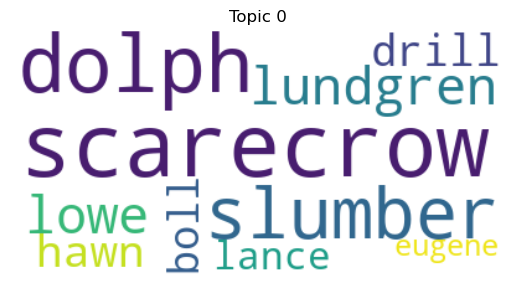

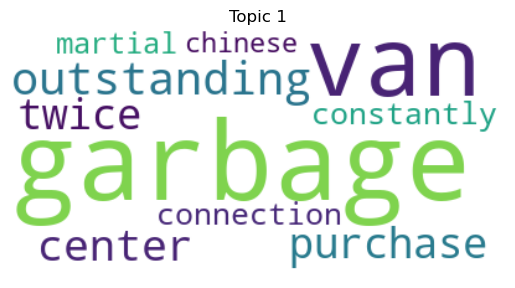

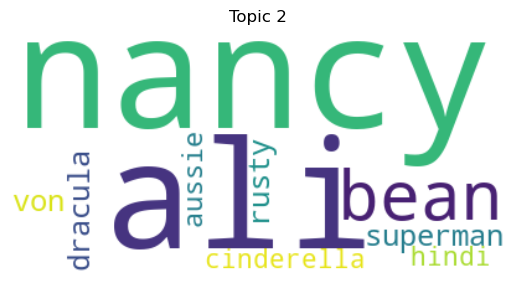

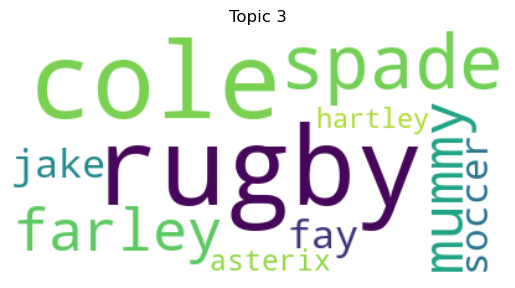

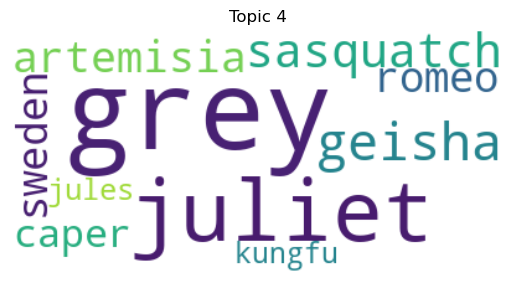

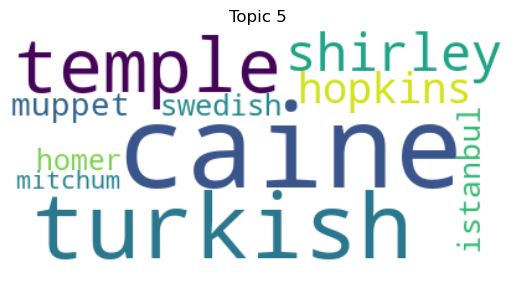

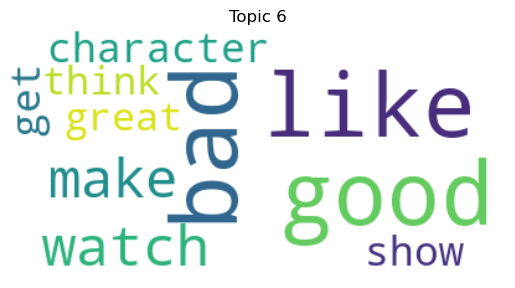

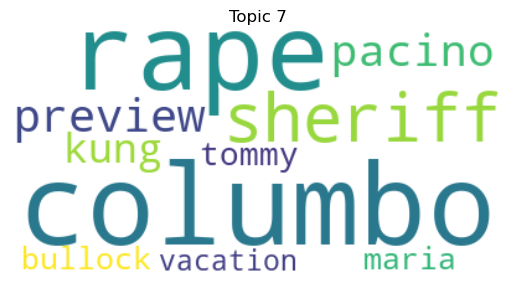

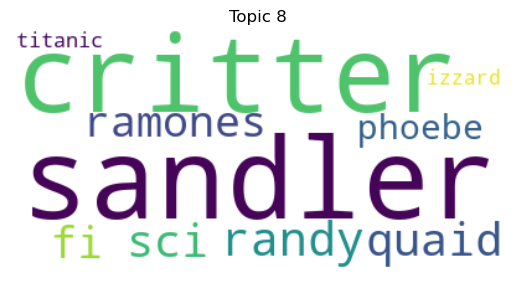

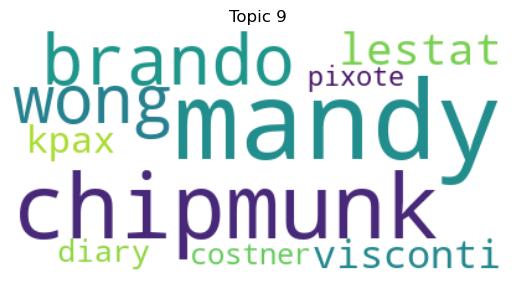

In [111]:
for i in range(0,10):
    create_wordcloud(ldamodel, topic=i)